# Sommaire :
 
<a href="#A1">**Partie 3 : Exploration des données**</a> 
 - <a href="#C18"> 3-1-Analyse univariée</a>
 - <a href="#C16">3-2-Analyse bivariée</a> 
 - <a href="#C17">3-3-Réduction des dimensions (méthode ACP)</a>
 
<a href="#A2">**Partie 4 : Scoring et conclusion**</a>
 - <a href="#C15">4-1-Scoring</a>

In [1]:
#Importation des librairies et des données
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import sklearn
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from matplotlib.collections import LineCollection
import statsmodels as sm

In [2]:
data_28=pd.read_csv(r"C:\Users\John\Desktop\Formation\3-Concevez une application au service de la santé publique\2-Projet\df_3aa.csv")
data_28.drop(columns='Unnamed: 0',inplace=True)

## <a name="C18"> 3-1-Analyse univariée</a>

In [3]:
features_num_33=['energy_100g', 'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g', 'alcohol_100g']  

In [4]:
data_28[features_num_33].describe().T

count        mean         std  min    25%     50%  \
energy_100g         22621.0  926.604502  698.657996  0.0  310.0  729.00   
fat_100g            22621.0    9.007942   11.096148  0.0    1.0    4.40   
saturated-fat_100g  22621.0    3.053632    4.185160  0.0    0.2    1.10   
carbohydrates_100g  22621.0   27.685410   26.302938  0.0    5.9   15.00   
sugars_100g         22621.0    8.566406   10.472359  0.0    1.3    3.70   
fiber_100g          22621.0    2.112936    1.901332  0.0    0.5    1.70   
proteins_100g       22621.0    6.362030    5.407720  0.0    1.7    5.67   
alcohol_100g        22621.0    0.006436    0.251146  0.0    0.0    0.00   

                       75%          max  
energy_100g         1523.0  3464.000000  
fat_100g              14.0    81.410768  
saturated-fat_100g     4.0    18.000000  
carbohydrates_100g    52.1   100.000000  
sugars_100g           12.0    43.000000  
fiber_100g             3.1     8.000000  
proteins_100g          9.0    24.700000  
alcohol_100g           0.0    20.000000

<AxesSubplot:xlabel='alcohol_100g', ylabel='Density'>

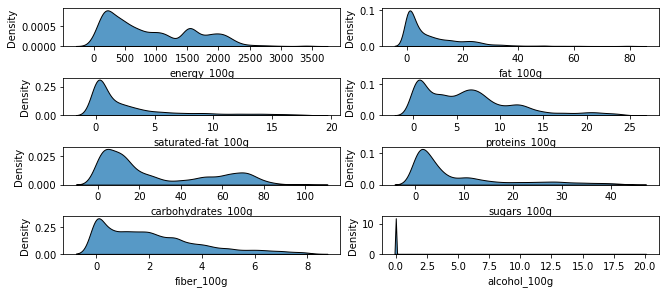

In [5]:
fig, axes = plt.subplots(4, 2)
plt.tight_layout(rect=(0, 0, 1.5, 1))
sns.kdeplot(data=data_28, x="energy_100g",multiple="stack", ax = axes[0,0])
sns.kdeplot(data=data_28, x="fat_100g",multiple="stack", ax = axes[0,1])
sns.kdeplot(data=data_28, x="saturated-fat_100g",multiple="stack", ax = axes[1,0])
sns.kdeplot(data=data_28, x="proteins_100g",multiple="stack", ax = axes[1,1])
sns.kdeplot(data=data_28, x="carbohydrates_100g",multiple="stack", ax = axes[2,0])
sns.kdeplot(data=data_28, x="sugars_100g",multiple="stack", ax = axes[2,1])
sns.kdeplot(data=data_28, x="fiber_100g",multiple="stack", ax = axes[3,0])
sns.kdeplot(data=data_28, x="alcohol_100g",multiple="stack", ax = axes[3,1])

## <a name="C16">3-2-Analyse bivariée (ANOVA et matrice de corrélation</a>

### ANOVA

Pour réaliser une ANOVA on va utiliser en variables d'une part les catégories pnns_2 et d'autres part les variables _100g transformées en valeurs qualitatives (0 quand la catégorie d'aliment est inférieur ou égal à la moyenne sur cette variable, 1 quand la catégorie est supérieur à la moyenne)

In [6]:
X = 'pnns_groups_2' 
Y = [i for i in data_28.columns if i.endswith('100g')==True]

In [7]:
data_28
[['pnns_groups_2']+features_num_33]

[['pnns_groups_2',
  'energy_100g',
  'fat_100g',
  'saturated-fat_100g',
  'carbohydrates_100g',
  'sugars_100g',
  'fiber_100g',
  'proteins_100g',
  'alcohol_100g']]

In [8]:
#on fait une ANOVA avec les groupes et 'fiber_100g' découpées en 5 tranches
#Création du tableau pnns_groups_2 + features
d31=data_28.loc[:,['pnns_groups_2']+features_num_33]

In [9]:
#on fait un pd.cut(x,bins=5) avec la colonne fibers_100g
d31_f=pd.cut(d31['fiber_100g'],bins=5)
d31_f=pd.DataFrame(d31_f)
d31_f['pnns_groups_2']=data_28['pnns_groups_2']

In [10]:
#on transpose la colonne 'fiber_100g'
pivot=pd.crosstab(d31_f['pnns_groups_2'], d31_f['fiber_100g'],rownames=['pnns_groups_2'], colnames=['fiber_100g'])
pivot

fiber_100g                                 (-0.008, 1.6]  (1.6, 3.2]  \
pnns_groups_2                                                          
groups_2_Alcoholic beverages                         640         372   
groups_2_Appetizers                                   79         272   
groups_2_Artificially sweetened beverages            104           5   
groups_2_Biscuits and cakes                          466         927   
groups_2_Bread                                        44         310   
groups_2_Breakfast cereals                            35         133   
groups_2_Cereals                                     341         833   
groups_2_Cheese                                      375           4   
groups_2_Chocolate products                           27          21   
groups_2_Dairy desserts                              360          43   
groups_2_Dressings and sauces                        609         302   
groups_2_Dried fruits                                  9           3   
groups_2_Eggs                                         55           0   
groups_2_Fats                                        112           3   
groups_2_Fish and seafood                            614          45   
groups_2_Fruit juices                                687          10   
groups_2_Fruit nectars                               138           0   
groups_2_Fruits                                      362         393   
groups_2_Ice cream                                   296          65   
groups_2_Meat                                        250          45   
groups_2_Milk and yogurt                             837          11   
groups_2_Non-sugared beverages                       614          15   
groups_2_Nuts                                         15          14   
groups_2_One-dish meals                             1616        1138   
groups_2_Pizza pies and quiche                       116         155   
groups_2_Potatoes                                     13          14   
groups_2_Processed meat                              577          14   
groups_2_Salty and fatty products                      0           0   
groups_2_Sandwich                                    117         167   
groups_2_Soups                                       295          57   
groups_2_Sweetened beverages                         553           0   
groups_2_Sweets                                      236          81   
groups_2_Tripe dishes                                 18           5   
groups_2_Vegetables                                  317         695   
groups_2_pastries                                     61         156   

fiber_100g                                 (3.2, 4.8]  (4.8, 6.4]  (6.4, 8.0]  
pnns_groups_2                                                                  
groups_2_Alcoholic beverages                      145          87          55  
groups_2_Appetizers                               411         142          39  
groups_2_Artificially sweetened beverages           4           0           0  
groups_2_Biscuits and cakes                       483         199          71  
groups_2_Bread                                    295         174         117  
groups_2_Breakfast cereals                        202         259         216  
groups_2_Cereals                                  540         157         122  
groups_2_Cheese                                     1           0           0  
groups_2_Chocolate products                        25          12          20  
groups_2_Dairy desserts                             2           0           0  
groups_2_Dressings and sauces                      89          27          16  
groups_2_Dried fruits                               3          38          34  
groups_2_Eggs                                       0           0           0  
groups_2_Fats                                       0           0           2  
groups_2_Fish and seafood                           3  

In [11]:
#on met les totaux en fin de colonne et en fin de lignes
d46g=pivot.groupby(['pnns_groups_2']).sum()
d46g.loc['Total',:]= pivot.sum(axis=0)
d46g['Total']=pivot.sum(axis=1)
d46g.sort_values('Total',ascending=False)

fiber_100g                                 (-0.008, 1.6]  (1.6, 3.2]  \
pnns_groups_2                                                          
groups_2_One-dish meals                           1616.0      1138.0   
groups_2_Biscuits and cakes                        466.0       927.0   
groups_2_Cereals                                   341.0       833.0   
groups_2_Vegetables                                317.0       695.0   
groups_2_Alcoholic beverages                       640.0       372.0   
groups_2_Dressings and sauces                      609.0       302.0   
groups_2_Appetizers                                 79.0       272.0   
groups_2_Bread                                      44.0       310.0   
groups_2_Milk and yogurt                           837.0        11.0   
groups_2_Breakfast cereals                          35.0       133.0   
groups_2_Fruits                                    362.0       393.0   
groups_2_Fruit juices                              687.0        10.0   
groups_2_Fish and seafood                          614.0        45.0   
groups_2_Non-sugared beverages                     614.0        15.0   
groups_2_Processed meat                            577.0        14.0   
groups_2_Sweetened beverages                       553.0         0.0   
groups_2_Dairy desserts                            360.0        43.0   
groups_2_Cheese                                    375.0         4.0   
groups_2_Ice cream                                 296.0        65.0   
groups_2_Sweets                                    236.0        81.0   
groups_2_Soups                                     295.0        57.0   
groups_2_Sandwich                                  117.0       167.0   
groups_2_Meat                                      250.0        45.0   
groups_2_Pizza pies and quiche                     116.0       155.0   
groups_2_pastries                                   61.0       156.0   
groups_2_Fruit nectars                             138.0         0.0   
groups_2_Nuts                                       15.0        14.0   
groups_2_Fats                                      112.0         3.0   
groups_2_Artificially sweetened beverages          104.0         5.0   
groups_2_Chocolate products                         27.0        21.0   
groups_2_Dried fruits                                9.0         3.0   
groups_2_Eggs                                       55.0         0.0   
groups_2_Potatoes                                   13.0        14.0   
groups_2_Tripe dishes                               18.0         5.0   
groups_2_Salty and fatty products                    0.0         0.0   
Total                                            10988.0      6308.0   

fiber_100g                                 (3.2, 4.8]  (4.8, 6.4]  (6.4, 8.0]  \
pnns_groups_2                                                                   
groups_2_One-dish meals                         321.0       145.0        65.0   
groups_2_Biscuits and cakes                     483.0       199.0        71.0   
groups_2_Cereals                                540.0       157.0       122.0   
groups_2_Vegetables                             256.0       160.0        75.0   
groups_2_Alcoholic beverages                    145.0        87.0        55.0   
groups_2_Dressings and sauces                    89.0        27.0        16.0   
groups_2_Appetizers                             411.0       142.0        39.0   
groups_2_Bread                                  295.0       174.0       117.0   
groups_2_Milk and yogurt                          2.0         0.0         0.0   
groups_2_Breakfast cereals                      202.0       259.0       216.0   
groups_2_Fruits                                  12.0         8.0         4.0   
groups_2_Fruit juices                             1.0         0.0         0.0   
groups_2_Fish and seafood                         3.0         0.0         0.0   
groups_2_Non-sugared beverages                  

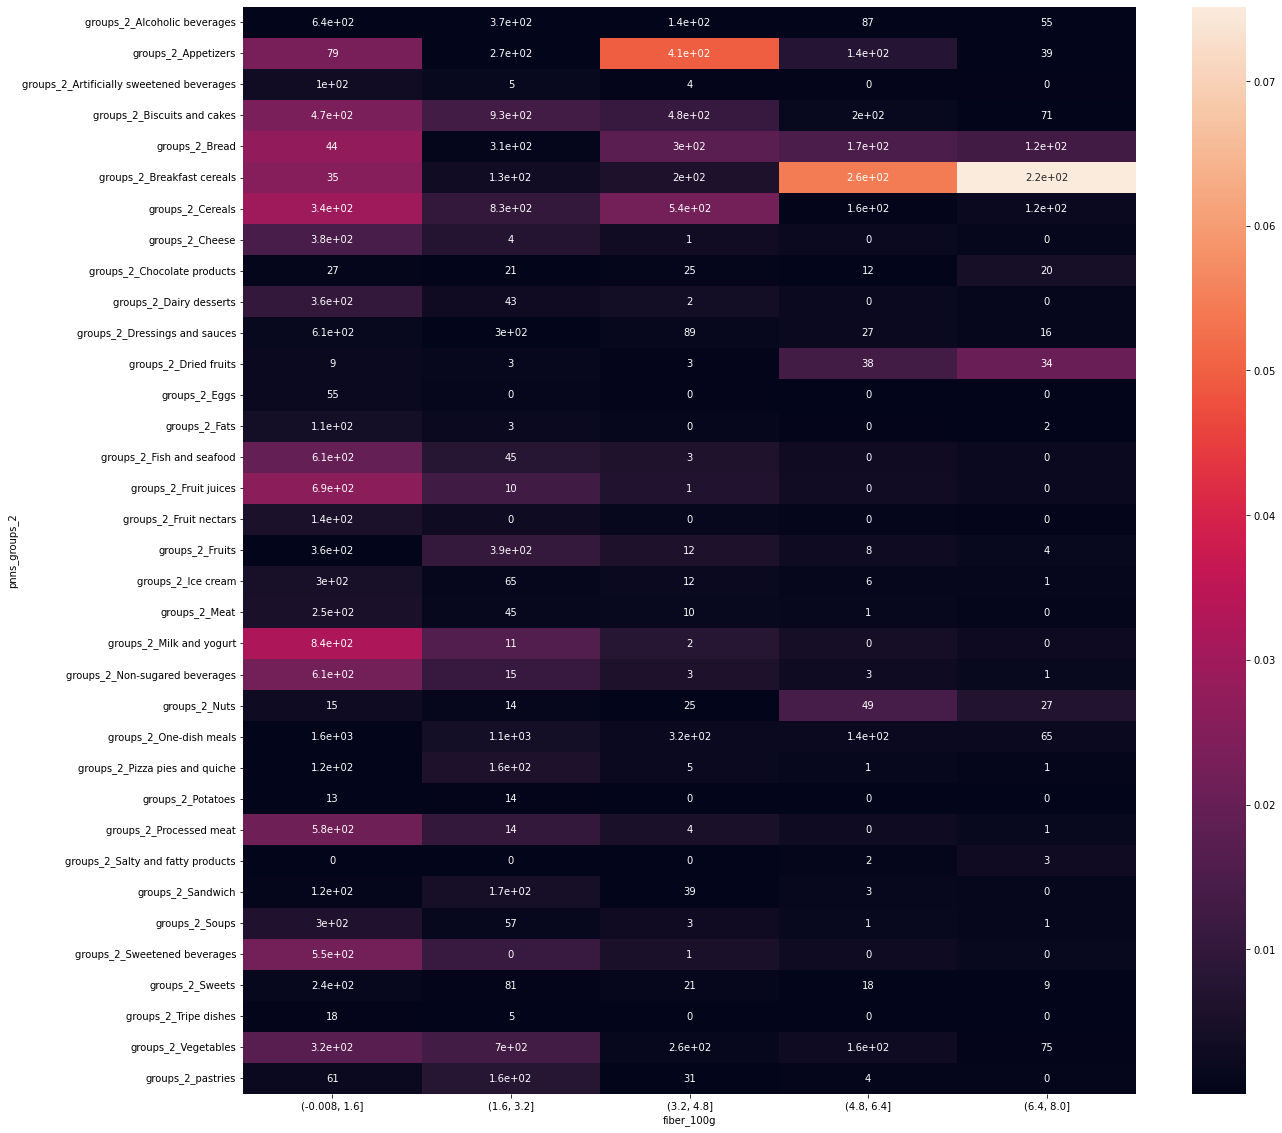

In [12]:
#Le tableau d'ANOVA
import seaborn as sns
plt.figure(figsize=(20,20))
tx = d46g.loc[:,["Total"]]
ty = d46g.loc[["Total"],:]
n = len(data_28)
indep = tx.dot(ty) / n

c = d46g.fillna(0) # On remplace les valeurs nulles par 0
measure = (c-indep)**2/indep
xi_n = measure.sum().sum()
table = measure/xi_n
sns.heatmap(table.iloc[:-1,:-1],annot=c.iloc[:-1,:-1])
plt.show()

In [13]:
d47g=d46g.drop(labels = ['groups_2_Alcoholic beverages', 'groups_2_Appetizers',
       'groups_2_Artificially sweetened beverages',
       'groups_2_Biscuits and cakes', 'groups_2_Bread',
       'groups_2_Breakfast cereals', 'groups_2_Cereals', 'groups_2_Cheese',
       'groups_2_Chocolate products', 'groups_2_Dairy desserts',
       'groups_2_Dressings and sauces', 'groups_2_Dried fruits',
       'groups_2_Eggs', 'groups_2_Fats', 'groups_2_Fish and seafood',
       'groups_2_Fruit juices', 'groups_2_Fruit nectars', 'groups_2_Fruits',
       'groups_2_Ice cream', 'groups_2_Meat', 'groups_2_Milk and yogurt',
        'groups_2_Nuts',
       'groups_2_One-dish meals', 'groups_2_Pizza pies and quiche',
       'groups_2_Potatoes', 
       'groups_2_Salty and fatty products', 'groups_2_Sandwich',
       'groups_2_Soups',  'groups_2_Sweets',
       'groups_2_Tripe dishes', 'groups_2_Vegetables', 'groups_2_pastries','Total'], axis = 0)

d47g.loc['Total']= d47g.sum()
d47g

fiber_100g                      (-0.008, 1.6]  (1.6, 3.2]  (3.2, 4.8]  \
pnns_groups_2                                                           
groups_2_Non-sugared beverages          614.0        15.0         3.0   
groups_2_Processed meat                 577.0        14.0         4.0   
groups_2_Sweetened beverages            553.0         0.0         1.0   
Total                                  1744.0        29.0         8.0   

fiber_100g                      (4.8, 6.4]  (6.4, 8.0]   Total  
pnns_groups_2                                                   
groups_2_Non-sugared beverages         3.0         1.0   636.0  
groups_2_Processed meat                0.0         1.0   596.0  
groups_2_Sweetened beverages           0.0         0.0   554.0  
Total                                  3.0         2.0  1786.0

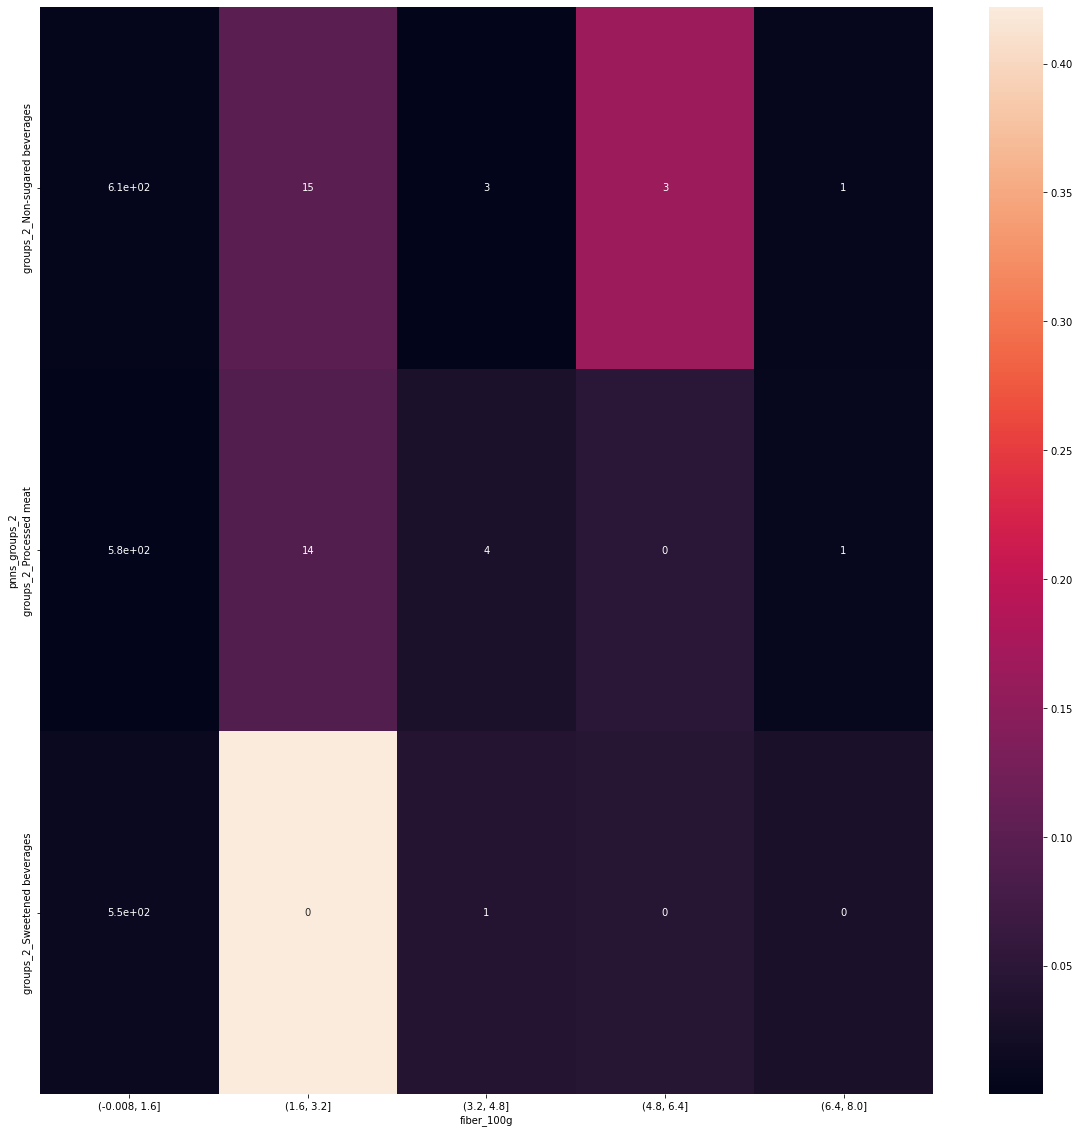

In [14]:
#détail sur une partie du tableau ANOVA
import seaborn as sns
plt.figure(figsize=(20,20))
tx = d47g.loc[:,["Total"]]
ty = d47g.loc[["Total"],:]
n = len(data_28.loc[(data_28['pnns_groups_2'].str.contains('groups_2_Processed meat'))|(data_28['pnns_groups_2'].str.contains('groups_2_Sweetened beverages'))|(data_28['pnns_groups_2'].str.contains('Non-sugared beverages')),:])
indep = tx.dot(ty) / n

c = d47g.fillna(0) # On remplace les valeurs nulles par 0
measure = (c-indep)**2/indep
xi_n = measure.sum().sum()
table = measure/xi_n
sns.heatmap(table.iloc[:-1,:-1],annot=c.iloc[:-1,:-1])
plt.show()

In [15]:
print('valeur de Xi_2 : ',xi_n,'\nnb de degrés de liberté :', (tx.size-2)*((ty.size-2)))

valeur de Xi_2 :  21.313164404584363 
nb de degrés de liberté : 8


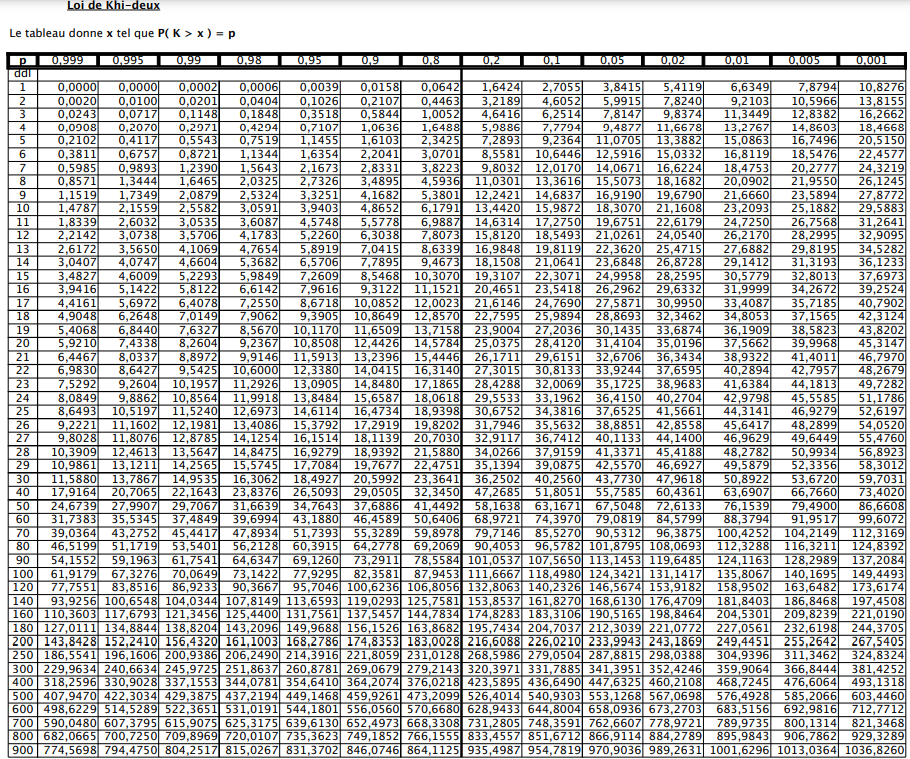

## Matrice de corrélation

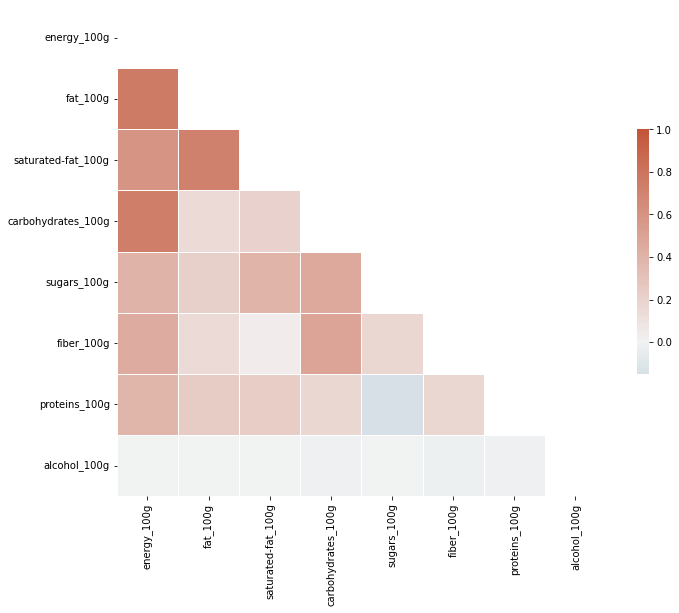

In [16]:
# Compute the correlation matrix
corr = data_28[features_num_33].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

In [17]:
features_pp=features_num_33+['pnns_groups_2']

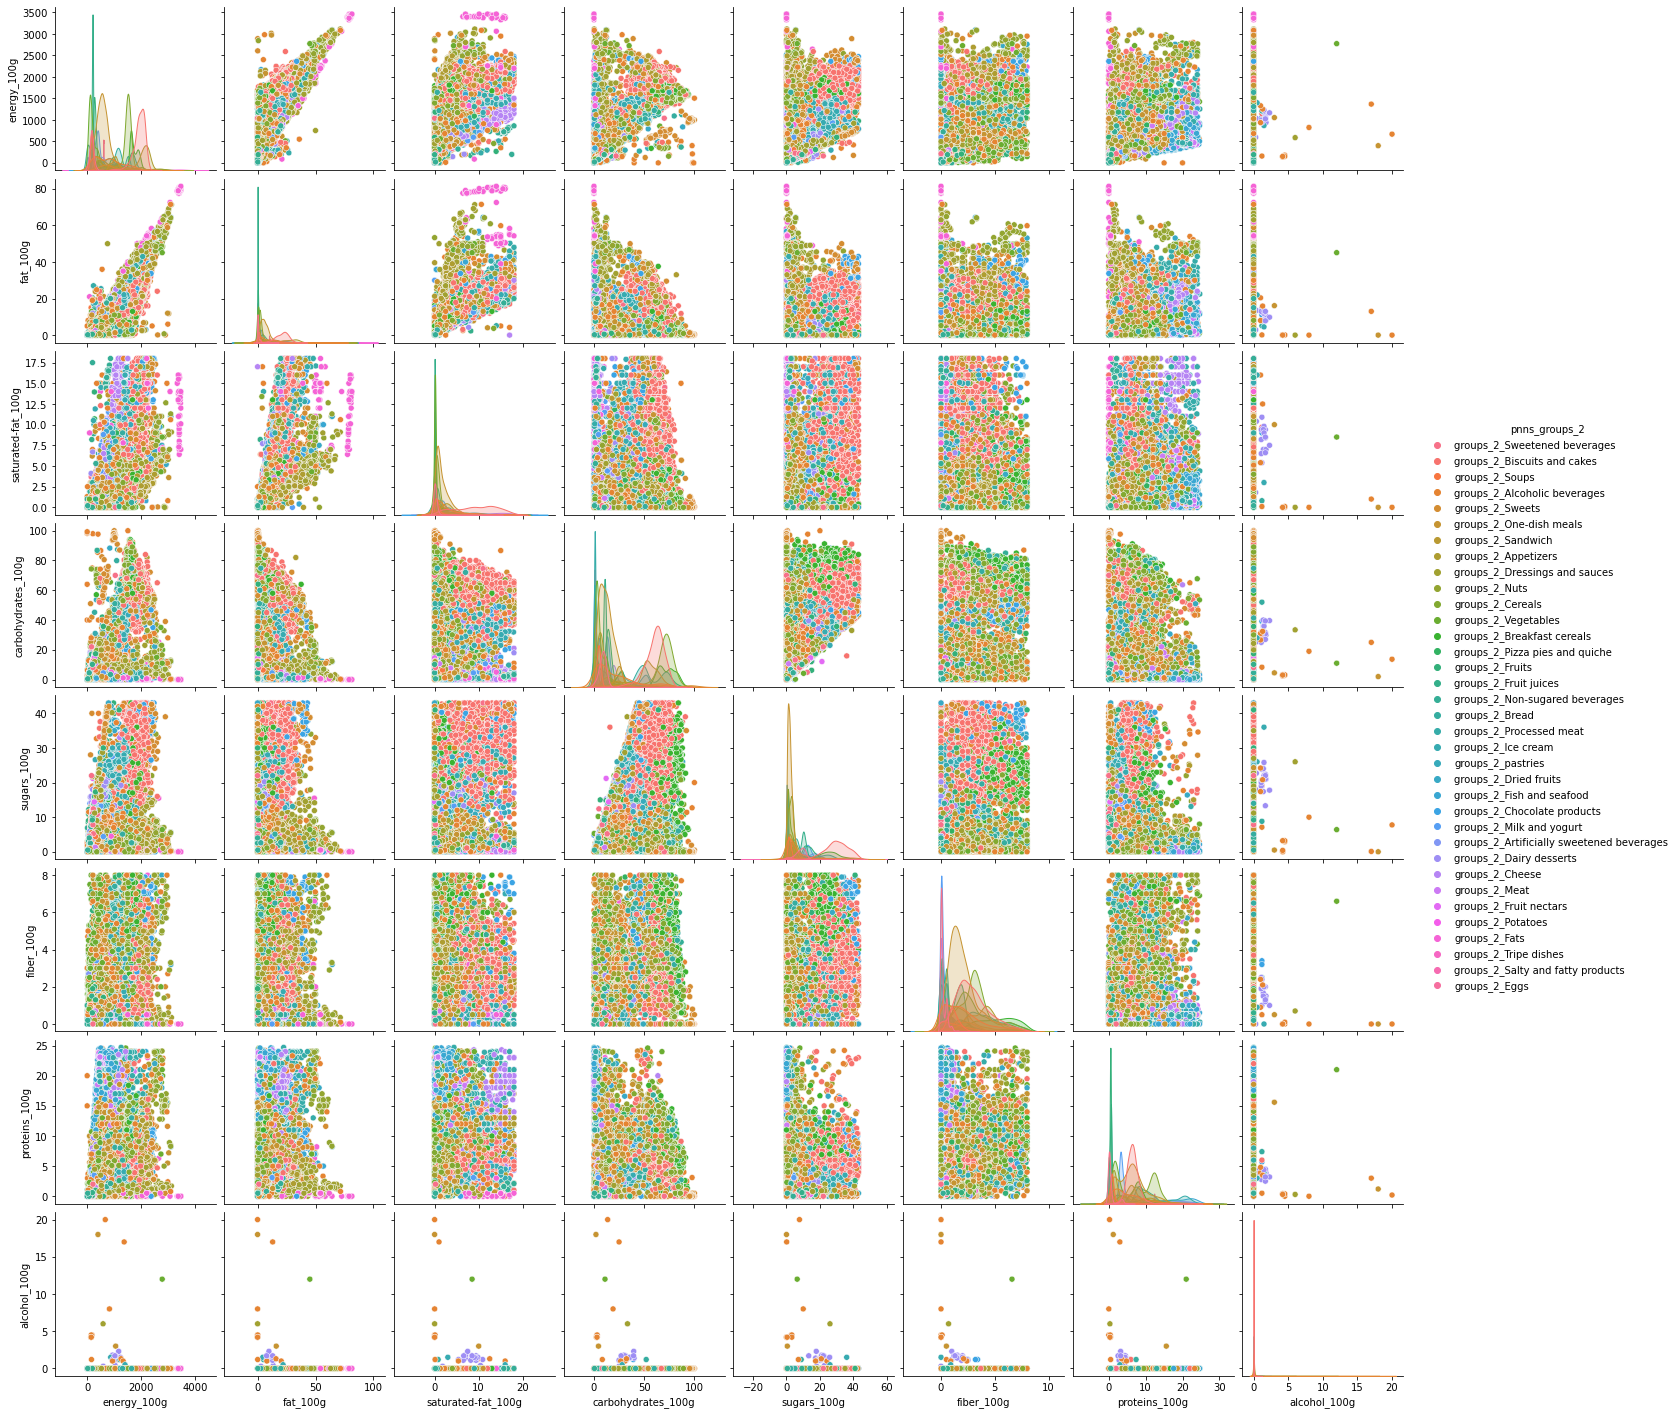

In [18]:
sns.pairplot(data_28[features_pp], hue="pnns_groups_2")

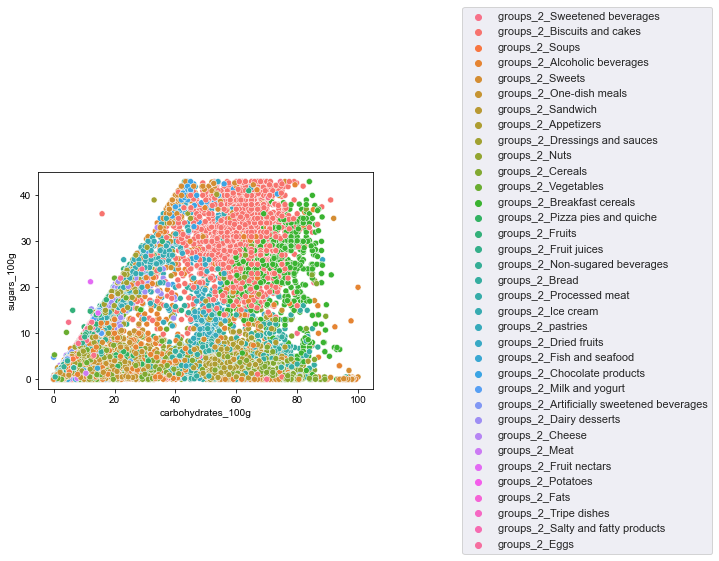

In [19]:
g=sns.scatterplot(data=data_28, x="carbohydrates_100g", y='sugars_100g', hue="pnns_groups_2")
sns.set(rc={'figure.figsize':(11.7,8.27)})
g.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)
#La frontière correspond à %sucres=%carbohydrates. Elles montre que les sucres sont une partie des carbohydrates. 
#Les valeurs à gauche de la ligne sont des valeurs aberrantes (sans impact pour l'analyse)

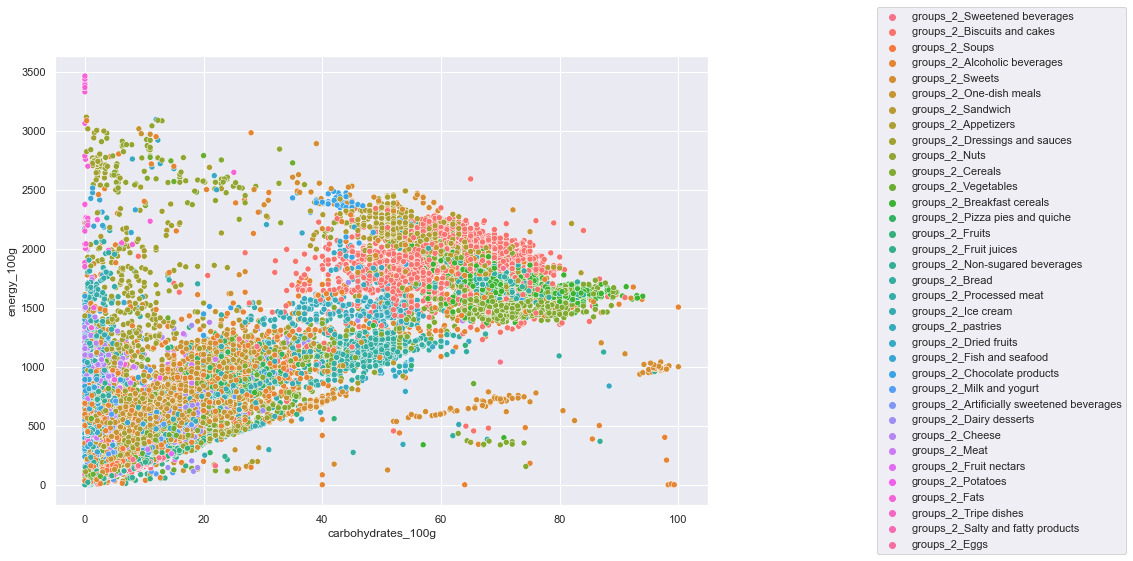

In [20]:
g=sns.scatterplot(data=data_28, x="carbohydrates_100g", y="energy_100g", hue="pnns_groups_2")
sns.set(rc={'figure.figsize':(11.7,8.27)})
g.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)

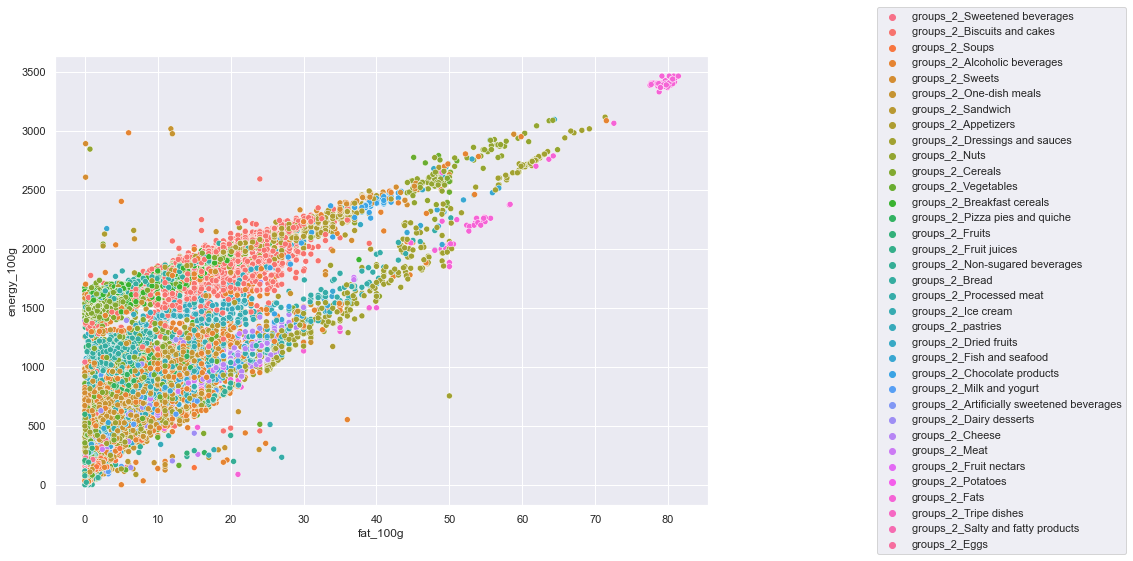

In [21]:
g=sns.scatterplot(data=data_28, x="fat_100g", y="energy_100g", hue="pnns_groups_2")
sns.set(rc={'figure.figsize':(11.7,8.27)})
g.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)

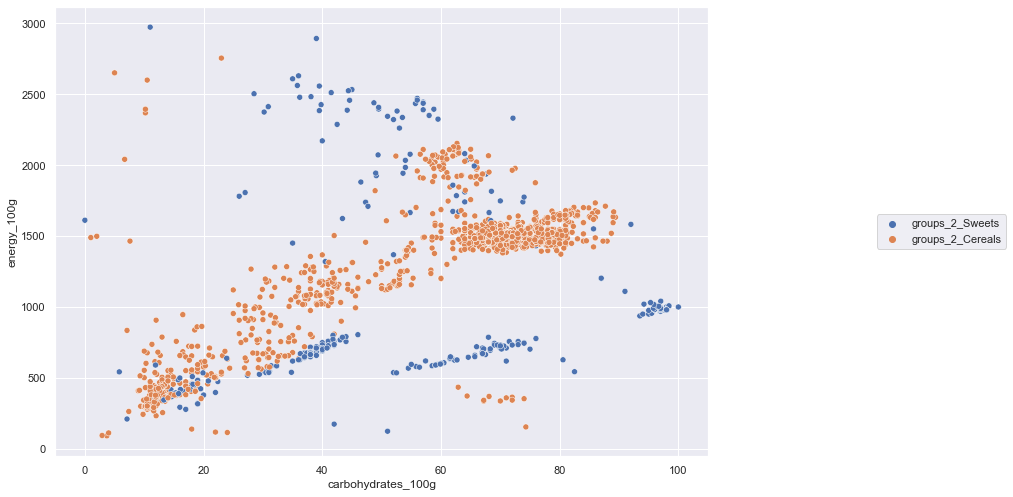

In [22]:
g=sns.scatterplot(data=data_28.loc[data_28['pnns_groups_2'].str.contains(pat='Cereals|Sweets',regex=True),:], x="carbohydrates_100g", y="energy_100g", hue="pnns_groups_2")
sns.set(rc={'figure.figsize':(11.7,8.27)})
g.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)

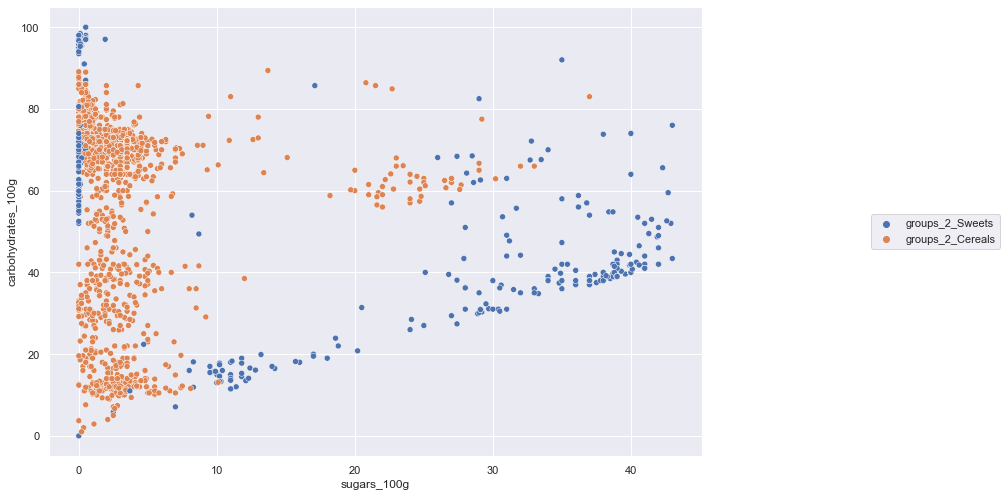

In [23]:
g=sns.scatterplot(data=data_28.loc[data_28['pnns_groups_2'].str.contains(pat='Cereals|Sweets',regex=True),:], x="sugars_100g", y="carbohydrates_100g", hue="pnns_groups_2")
sns.set(rc={'figure.figsize':(11.7,8.27)})
g.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)
#Sur internet on peut voir que 100g de carbohydrates correspond à 1700kJ. C'est cohérent avec le point de convergence. 
#tout ce qui est en dessous sont des valeurs aberrantes.
#La ligne du haut reflète la diminution des autres éléments au profit des carbohydrates qui atteignent 100% 
#de la constitution du produit au niveau du point de convergence.

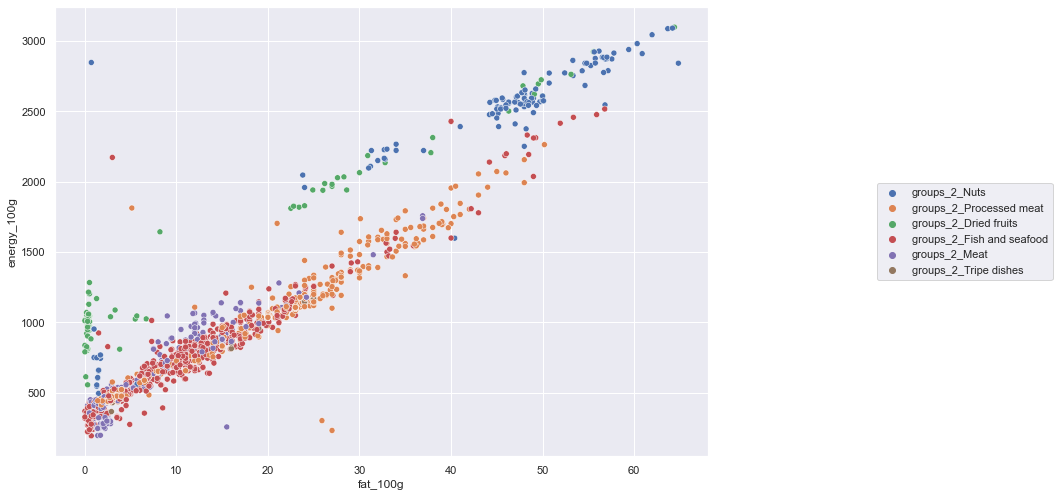

In [24]:
g=sns.scatterplot(data=data_28.loc[data_28['pnns_groups_2'].str.contains(pat='Nut|Dried|eat|Tripe|seafood',regex=True),:], x="fat_100g", y="energy_100g", hue="pnns_groups_2")
sns.set(rc={'figure.figsize':(11.7,8.27)})
g.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)

## <a name="C17">3-3-Réduction des dimensions (méthode ACP)<a/>

## Scaling

In [25]:
data_28.iloc[:,10:30]

additives_fr nutrition_grade_fr  \
0      E150d - Caramel au sulfite d'ammonium,E338 - A...                  e   
1      E422 - Glycérol,E503 - Carbonates d'ammonium,E...                  d   
2      E422 - Glycérol,E503 - Carbonates d'ammonium,E...                  d   
3      E202 - Sorbate de potassium,E220 - Anhydride s...                  d   
4      E422 - Glycérol,E500 - Carbonates de sodium,E4...                  e   
...                                                  ...                ...   
22616                                                NaN                  c   
22617  E420 - Sorbitol,E955 - Sucralose,E950 - Acésul...                  c   
22618  E420 - Sorbitol,E955 - Sucralose,E950 - Acésul...                  b   
22619                                                NaN                  a   
22620                                                NaN                  c   

              pnns_groups_1                   pnns_groups_2 main_category_fr  \
0                 Beverages    groups_2_Sweetened beverages            Sodas   
1             Sugary snacks     groups_2_Biscuits and cakes          Gâteaux   
2             Sugary snacks     groups_2_Biscuits and cakes          Gâteaux   
3             Sugary snacks     groups_2_Biscuits and cakes      Pâtisseries   
4             Sugary snacks     groups_2_Biscuits and cakes      Pâtisseries   
...                     ...                             ...              ...   
22616             Beverages           groups_2_Fruit juices    Jus de fruits   
22617         Sugary snacks                 groups_2_Sweets          Bonbons   
22618         Sugary snacks                 groups_2_Sweets          Bonbons   
22619  Cereals and potatoes                  groups_2_Bread            Pains   
22620             Beverages  groups_2_Non-sugared beverages       Thés verts   

                                               image_url  \
0      http://fr.openfoodfacts.org/images/products/00...   
1                                                    NaN   
2                                                    NaN   
3                                                    NaN   
4                                                    NaN   
...                                                  ...   
22616                                                NaN   
22617  http://fr.openfoodfacts.org/images/products/96...   
22618                                                NaN   
22619  http://fr.openfoodfacts.org/images/products/98...   
22620  http://fr.openfoodfacts.org/images/products/99...   

                                         image_small_url  energy_100g  \
0      http://fr.openfoodfacts.org/images/products/00...        177.0   
1                                                    NaN       1900.0   
2                                                    NaN       1768.0   
3                                                    NaN       1670.0   
4                                                    NaN       1868.0   
...                                                  ...          ...   
22616                                                NaN        192.0   
22617  http://fr.openfoodfacts.org/images/products/96...       1017.0   
22618                                                NaN       1031.0   
22619  http://fr.openfoodfacts.org/images/products/98...       1643.0   
22620  http://fr.openfoodfacts.org/images/products/99...         21.0   

       energy-from-fat_100g  fat_100g  saturated-fat_100g  \
0                       NaN       0.0                0.00   
1                       NaN      23.0                2.50   
2                       NaN      19.0                2.50   
3                       NaN      15.0                2.00   
4                       NaN      23.0               10.00   
...                     ...       ...                 ...   
22616                   NaN       0.5                0.00   
22617                   NaN       1.3           

In [26]:
data_33=data_28.groupby(['pnns_groups_2']).mean()

In [27]:
#data_33=data_28.copy()
X=data_33[features_num_33].dropna().values
X.shape

(35, 8)

In [28]:
scaler = StandardScaler()

In [29]:
scaler.fit(X)

StandardScaler()

In [30]:
X_scaled=scaler.transform(X)

## Explained variance and screeplot

In [31]:
n_components = 6

In [32]:
pca = PCA(n_components=n_components)

In [33]:
pca.fit(X_scaled)

PCA(n_components=6)

In [34]:
scree = (pca.explained_variance_ratio_*100).round(2)

In [35]:
scree_cum = scree.cumsum().round()

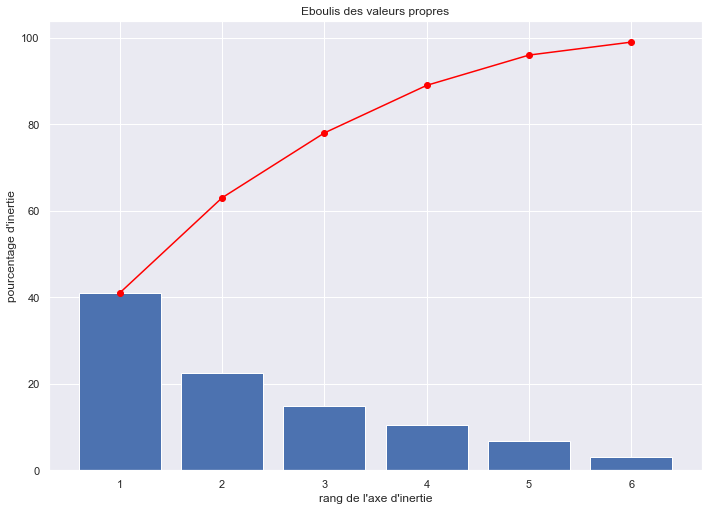

In [36]:
x_list = range(1, n_components+1)
list(x_list)
plt.bar(x_list, scree)
plt.plot(x_list, scree_cum,c="red",marker='o')
plt.xlabel("rang de l'axe d'inertie")
plt.ylabel("pourcentage d'inertie")
plt.title("Eboulis des valeurs propres")
plt.show(block=False)

In [37]:
pcs = pca.components_
pcs = pd.DataFrame(pcs)
pcs.columns = features_num_33
pcs.index = [f"F{i}" for i in x_list]
pcs.round(2)

energy_100g  fat_100g  saturated-fat_100g  carbohydrates_100g  \
F1         0.54      0.41                0.38                0.38   
F2         0.10      0.40                0.37               -0.46   
F3        -0.03      0.16                0.37               -0.18   
F4        -0.05     -0.21               -0.15                0.06   
F5         0.20      0.35               -0.34               -0.06   
F6        -0.16      0.22               -0.19               -0.68   

    sugars_100g  fiber_100g  proteins_100g  alcohol_100g  
F1         0.26        0.39           0.19         -0.01  
F2        -0.48       -0.33           0.38         -0.12  
F3         0.31       -0.31          -0.38          0.68  
F4        -0.20        0.22           0.62          0.68  
F5        -0.55        0.35          -0.49          0.23  
F6         0.44        0.47           0.12         -0.06

In [38]:
100/8

12.5

crière de Kaiser pour 8 dimensions => on élimine de l'analyse les composantes qui retiennent moins de 100/8=12,5% de l'inertie. C'est à dire que les composantes retenues sont F1, F2 et F3.

In [39]:
pcs.T

F1        F2        F3        F4        F5        F6
energy_100g         0.535841  0.101375 -0.034904 -0.046527  0.198566 -0.156954
fat_100g            0.413112  0.395770  0.159038 -0.210910  0.352683  0.218761
saturated-fat_100g  0.375661  0.365872  0.365755 -0.150682 -0.342681 -0.189766
carbohydrates_100g  0.379069 -0.455566 -0.180651  0.061971 -0.063515 -0.678255
sugars_100g         0.260919 -0.477202  0.310952 -0.196524 -0.550304  0.441619
fiber_100g          0.393381 -0.327565 -0.307814  0.219659  0.347755  0.466817
proteins_100g       0.185815  0.376670 -0.384395  0.616424 -0.489763  0.123103
alcohol_100g       -0.006633 -0.121597  0.684015  0.678201  0.226023 -0.058038

<AxesSubplot:>

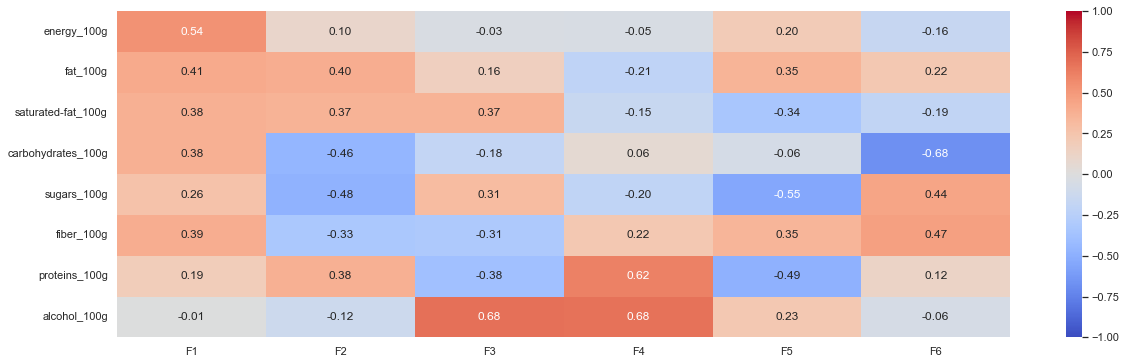

In [40]:
fig, ax = plt.subplots(figsize=(20, 6))
sns.heatmap(pcs.T, vmin=-1, vmax=1, annot=True, cmap="coolwarm", fmt="0.2f")

## Correlation graph

In [41]:
def correlation_graph(pca, 
                      x_y, 
                      features) : 
    """Affiche le graphe des correlations

    Positional arguments : 
    -----------------------------------
    pca : sklearn.decomposition.PCA : notre objet PCA qui a été fit
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2
    features : list ou tuple : la liste des features (ie des dimensions) à représenter
    """

    # Extrait x et y 
    x,y=x_y

    # Taille de l'image (en inches)
    fig, ax = plt.subplots(figsize=(10, 9))

    # Pour chaque composante : 
    for i in range(0, pca.components_.shape[1]):

        # Les flèches
        ax.arrow(0,0, 
                pca.components_[0, i],  
                pca.components_[1, i],  
                head_width=0.07,
                head_length=0.07, 
                width=0.02, )

        # Les labels
        plt.text(pca.components_[0, i] + 0.05,
                pca.components_[1, i] + 0.05,
                features[i])
        
    # Affichage des lignes horizontales et verticales
    plt.plot([-1, 1], [0, 0], color='grey', ls='--')
    plt.plot([0, 0], [-1, 1], color='grey', ls='--')

    # Nom des axes, avec le pourcentage d'inertie expliqué
    plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
    plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))

    # J'ai copié collé le code sans le lire
    plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))

    # Le cercle 
    an = np.linspace(0, 2 * np.pi, 100)
    plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale

    # Axes et display
    plt.axis('equal')
    plt.show(block=False)

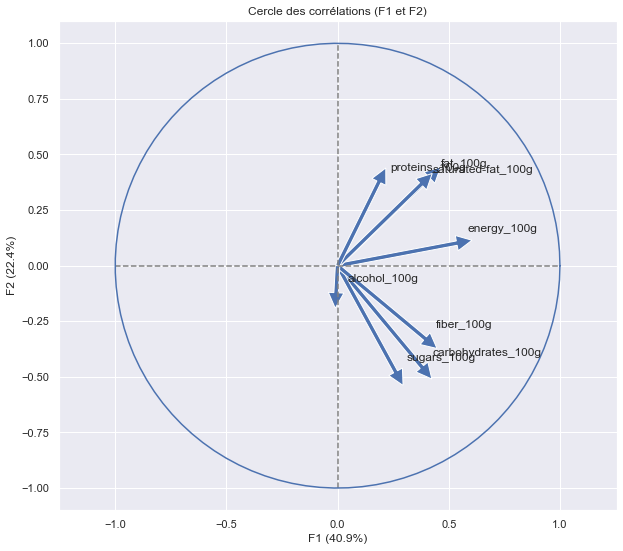

In [42]:
correlation_graph(pca, (0,1), features_num_33)

In [43]:
def correlation_graph2(pca, 
                      x_y, 
                      features) : 
    """Affiche le graphe des correlations

    Positional arguments : 
    -----------------------------------
    pca : sklearn.decomposition.PCA : notre objet PCA qui a été fit
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2
    features : list ou tuple : la liste des features (ie des dimensions) à représenter
    """

    # Extrait x et y 
    x,y=x_y

    # Taille de l'image (en inches)
    fig, ax = plt.subplots(figsize=(10, 9))

    # Pour chaque composante : 
    for i in range(0, pca.components_.shape[1]):

        # Les flèches
        ax.arrow(0,0, 
                pca.components_[2, i],  
                pca.components_[3, i],  
                head_width=0.07,
                head_length=0.07, 
                width=0.02, )

        # Les labels
        plt.text(pca.components_[2, i] + 0.05,
                pca.components_[3, i] + 0.05,
                features[i])
        
    # Affichage des lignes horizontales et verticales
    plt.plot([-1, 1], [0, 0], color='grey', ls='--')
    plt.plot([0, 0], [-1, 1], color='grey', ls='--')

    # Nom des axes, avec le pourcentage d'inertie expliqué
    plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
    plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))

    # J'ai copié collé le code sans le lire
    plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))

    # Le cercle 
    an = np.linspace(0, 2 * np.pi, 100)
    plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale

    # Axes et display
    plt.axis('equal')
    plt.show(block=False)

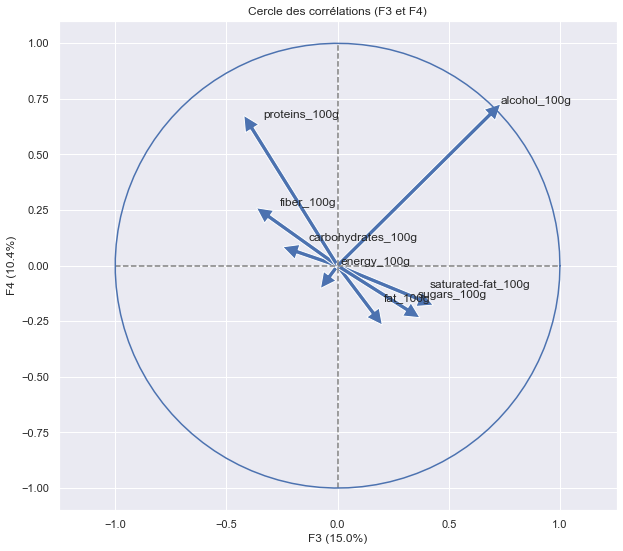

In [44]:
correlation_graph2(pca, (2,3), features_num_33)

## Projection

In [45]:
X_proj = pca.transform(X_scaled)
X_proj[:5]

array([[-0.35080611, -0.58038349,  2.4833306 ,  2.59219288,  1.06223028,
        -0.25697638],
       [ 2.27039534,  0.11419183, -0.81868443, -0.06912351,  1.05352365,
        -0.76980005],
       [-2.71398039, -0.19295872, -0.0434462 , -0.67470941,  0.47584245,
        -0.02337147],
       [ 3.20630987, -0.97533129,  0.73507465, -0.92889785, -1.29314662,
        -0.29566559],
       [ 0.99396817, -1.13561921, -1.50811649,  0.75784873,  0.43429384,
        -0.67419872]])

In [46]:
def display_factorial_planes(   X_projected, 
                                x_y, 
                                pca=None, 
                                labels = None,
                                clusters=None, 
                                alpha=1,
                                figsize=[10,8], 
                                marker="." ):
    """
    Affiche la projection des individus

    Positional arguments : 
    -------------------------------------
    X_projected : np.array, pd.DataFrame, list of list : la matrice des points projetés
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2

    Optional arguments : 
    -------------------------------------
    pca : sklearn.decomposition.PCA : un objet PCA qui a été fit, cela nous permettra d'afficher la variance de chaque composante, default = None
    labels : list ou tuple : les labels des individus à projeter, default = None
    clusters : list ou tuple : la liste des clusters auquel appartient chaque individu, default = None
    alpha : float in [0,1] : paramètre de transparence, 0=100% transparent, 1=0% transparent, default = 1
    figsize : list ou tuple : couple width, height qui définit la taille de la figure en inches, default = [10,8] 
    marker : str : le type de marker utilisé pour représenter les individus, points croix etc etc, default = "."
    """

    # Transforme X_projected en np.array
    X_ = np.array(X_projected)

    # On définit la forme de la figure si elle n'a pas été donnée
    if not figsize: 
        figsize = (7,6)

    # On gère les labels
    if  labels is None : 
        labels = []
    try : 
        len(labels)
    except Exception as e : 
        raise e

    # On vérifie la variable axis 
    if not len(x_y) ==2 : 
        raise AttributeError("2 axes sont demandées")   
    if max(x_y )>= X_.shape[1] : 
        raise AttributeError("la variable axis n'est pas bonne")   

    # on définit x et y 
    x, y = x_y

    # Initialisation de la figure       
    fig, ax = plt.subplots(1, 1, figsize=figsize)

    # On vérifie s'il y a des clusters ou non
    c = None if clusters is None else clusters
 
    # Les points    
    plt.scatter(   X_[:, x], 
                        X_[:, y], 
                        alpha=alpha, 
                        c=c, 
                        cmap="Set1", 
                        marker=marker)


    # Si la variable pca a été fournie, on peut calculer le % de variance de chaque axe 
    if pca : 
        v1 = str(round(100*pca.explained_variance_ratio_[x]))  + " %"
        v2 = str(round(100*pca.explained_variance_ratio_[y]))  + " %"
    else : 
        v1=v2= ''

    # Nom des axes, avec le pourcentage d'inertie expliqué
    ax.set_xlabel(f'F{x+1} {v1}')
    ax.set_ylabel(f'F{y+1} {v2}')

    # Valeur x max et y max
    x_max = np.abs(X_[:, x]).max() *1.1
    y_max = np.abs(X_[:, y]).max() *1.1

    # On borne x et y 
    ax.set_xlim(left=-x_max, right=x_max)
    ax.set_ylim(bottom= -y_max, top=y_max)

    # Affichage des lignes horizontales et verticales
    plt.plot([-x_max, x_max], [0, 0], color='grey', alpha=0.8)
    plt.plot([0,0], [-y_max, y_max], color='grey', alpha=0.8)

    # Affichage des labels des points
    if len(labels) : 
        # j'ai copié collé la fonction sans la lire
        for i,(_x,_y) in enumerate(X_[:,[x,y]]):
            plt.text(_x, _y+0.05, labels[i], fontsize='14', ha='center',va='center') 

    # Titre et display
    plt.title(f"Projection des individus (sur F{x+1} et F{y+1})")
    plt.show()

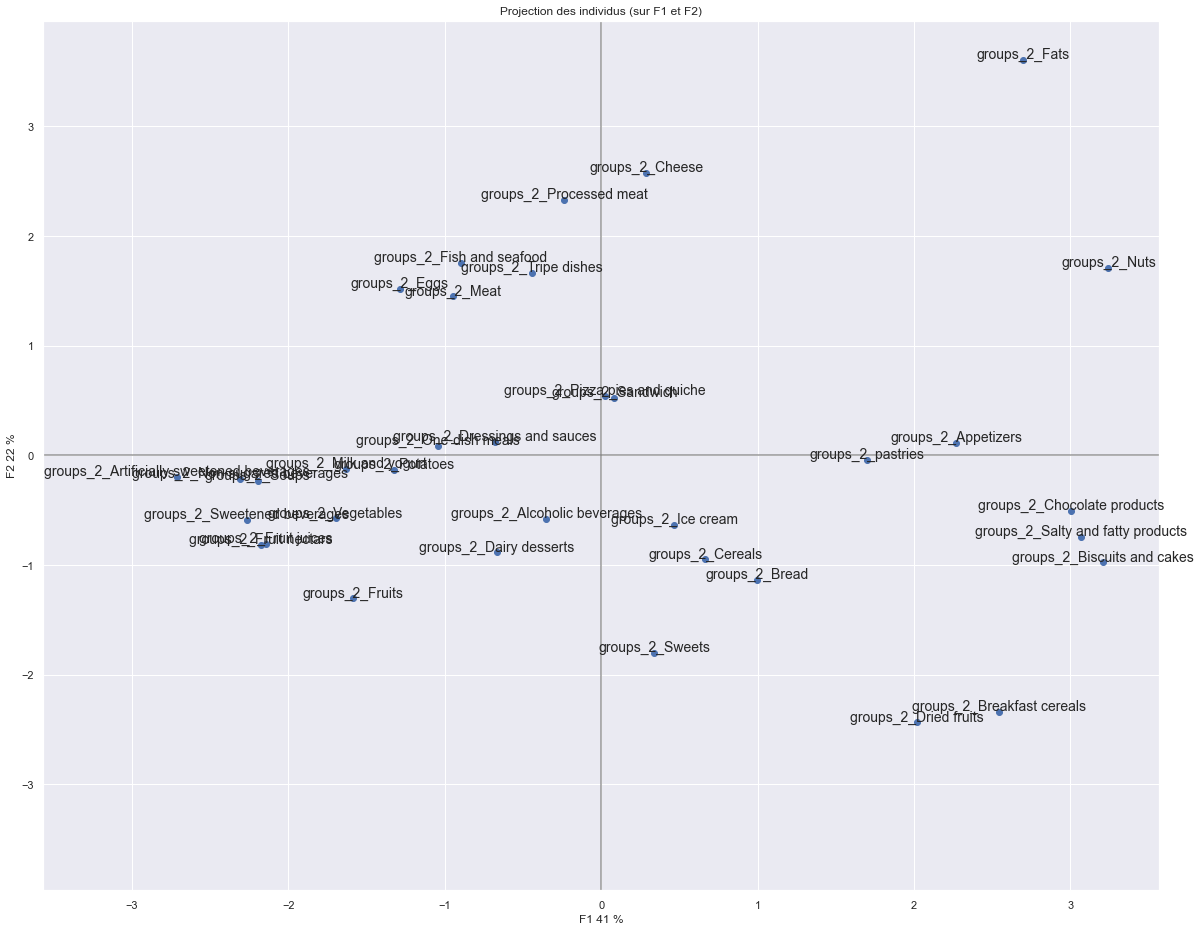

In [47]:

x_y = [0,1]
#display_factorial_planes(X_proj, x_y)
names=data_33.index
display_factorial_planes(X_proj, x_y, pca, labels=names, figsize=(20,16), marker="o")

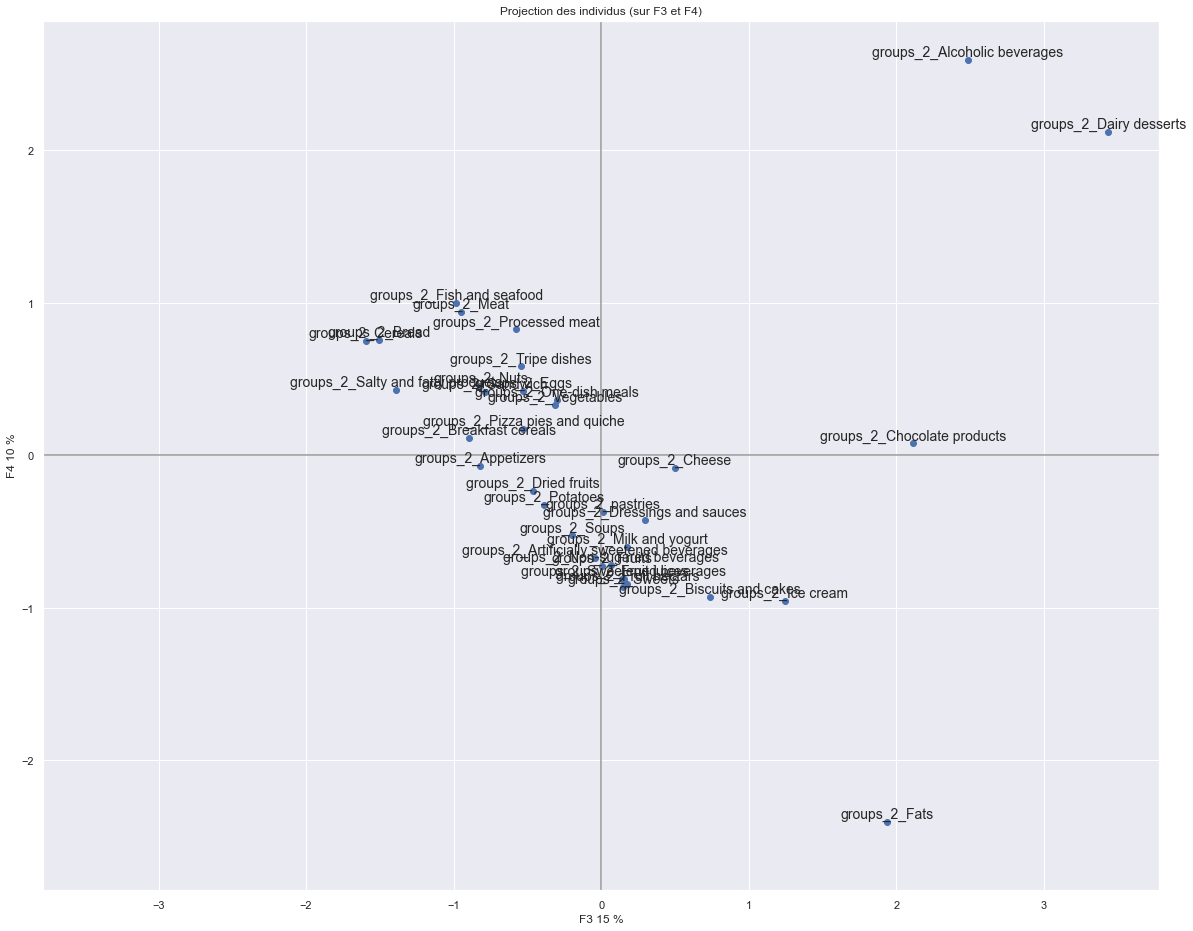

In [48]:
x_y = [2,3]
names=data_33.index
display_factorial_planes(X_proj, x_y, pca, labels=names, figsize=(20,16), marker="o")

Le quart nord-est de l'hyperplan F3-F4 est expliqué par la teneur en alcool des aliments. On constate que cela concerne trois types d'aliment : les boissons alcoolisées, les desserts et les produits chocolatés.

In [49]:
<a nam="#A2">**Partie 4 : Scoring et conclusion**</a>

SyntaxError: invalid syntax (1523752898.py, line 1)

## <a name="C15">4-1-Scoring</a> 

In [ ]:
features_num_33

In [ ]:
for i in ['fiber_100g', 'fat_100g','saturated-fat_100g']:
    score=str('score_'+i)
    data_33[score]=25*(1-(data_33[i]/data_33[i].max()))

for i in ['energy_100g',

 'carbohydrates_100g',
 'sugars_100g',

 'proteins_100g']:
    score=str('score_'+i)
    data_33[score]=5*data_33[i]/data_33[i].max()

i='alcohol_100g'
score=str('score_'+i)
data_33[score]=5*(1-(data_33[i]/data_33[i].max()))

In [ ]:
data_33['score_global']=data_33['score_proteins_100g']+data_33['score_sugars_100g']+data_33['score_carbohydrates_100g']+data_33['score_energy_100g']+data_33['score_saturated-fat_100g']+data_33['score_fat_100g']+data_33['score_fiber_100g']+data_33['alcohol_100g']

In [ ]:
data_33_fd=data_33.sort_values('score_global', ascending=False)

In [ ]:
data_33_fd.isna().sum()

In [ ]:
dsns=data_33_fd
for i in ['score_fiber_100g', 'score_fat_100g','score_saturated-fat_100g']:
    dsns[i]=dsns[i]*100/25
    
for i in ['score_energy_100g','score_carbohydrates_100g','score_sugars_100g', 'score_proteins_100g','score_alcohol_100g']:
    dsns[i]=dsns[i]*100/5

In [ ]:
dsns.reset_index(inplace=True)

In [ ]:
#Génération du graphique
sns.set_theme(style="whitegrid")

# Make the PairGrid
g = sns.PairGrid(dsns,x_vars=dsns[['score_global','score_fiber_100g','score_fat_100g','score_saturated-fat_100g',
                                   'score_sugars_100g','score_proteins_100g','score_carbohydrates_100g', 
                                   'score_energy_100g','score_alcohol_100g']],y_vars=dsns[['pnns_groups_2']],height=10, aspect=.25)

# Draw a dot plot using the stripplot function
g.map(sns.stripplot, size=10, orient="h", jitter=False,palette="flare_r", linewidth=1, edgecolor="w")

# Use the same x axis limits on all columns and add better labels
g.set(xlim=(0, 123), xlabel="score", ylabel="product")

# Use semantically meaningful titles for the columns
titles = ['score_global','score_fiber_100g','score_fat_100g','score_saturated-fat_100g','score_sugars_100g','score_proteins_100g','score_carbohydrates_100g','score_energy_100g','score_alcohol_100g']
    

for ax, title in zip(g.axes.flat, titles):

    # Set a different title for each axes
    ax.set(title=title)

    # Make the grid horizontal instead of vertical
    ax.xaxis.grid(False)
    ax.yaxis.grid(True)

sns.despine(left=True, bottom=True)